# Step 1: Install Requirements

In [2]:
# clone YOLOv5 repo 
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...


In [1]:
# install dependencies if you do not have a pytorch environment
# %pip install -qr requirements.txt 

import torch
import os
from IPython.display import Image, clear_output  # to display images
print(torch.__version__)
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})") # check the gpu

1.12.1
Setup complete. Using torch 1.12.1 (NVIDIA GeForce RTX 3090)


# Step 2: Import the datasets
Here I tried to translate the picture from RGB to gray, but I find that actually theeir performance on the detector have no difference 

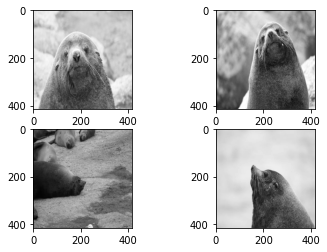

In [2]:
#display inference on ALL test images
from skimage.color import rgb2gray
import glob
import cv2
import numpy as np
from IPython.display import display
from PIL import Image
import matplotlib.pyplot as plt
i=1
for imageName in glob.glob('./datasets/test/images/*.jpg'): #assuming JPG
    plt.subplot(2,2,i)
    image = cv2.imread(imageName, cv2.IMREAD_GRAYSCALE)
    image=np.array(image)
    image_PIL=Image.open(imageName)
    image_G=image_PIL.convert('L')
    plt.imshow(image, cmap='gray')
    name = imageName.split("\\")[-1]
    # print(name)
    i=i+1
    # display(Image(filename=imageName))
    # print("D:\SEU\\pattern recognition\\furseal\\datasets\\test\\t\\"+name)
    # cv2.imwrite("D:\SEU\pattern recognition\\"+name,image)
plt.show()
# here we find that the value of three channels are same.

# Step 3-1: Train a custom face detection model based on YOLOv7 model

Here, we are able to pass a number of arguments:
- **img:** define input image size
- **batch:** determine batch size
- **epochs:** define the number of training epochs. (Note: often, 3000+ are common here!)
- **data:** Our dataset locaiton is saved in the `./datasets`
- **weights:** specify a path to weights to start transfer learning from. Here we choose the generic COCO pretrained checkpoint (the tiny version: yolov5s).
- **cache:** cache images for faster training

In [7]:
cd ../

/home/cmh


In [15]:
cd yolov7

/home/cmh/furseal/yolov7


In [20]:
!python train.py --workers 0 --device 0 --batch-size 32 --data ../datasets/data.yaml --img 416 --cfg cfg/training/yolov7x.yaml --weights '' --name yolov7x --hyp data/hyp.scratch.p5.yaml

YOLOR 🚀 2022-12-2 torch 1.12.1 CUDA:0 (NVIDIA GeForce RTX 3090, 24268.3125MB)

Namespace(weights='', cfg='cfg/training/yolov7x.yaml', data='../datasets/data.yaml', hyp='data/hyp.scratch.p5.yaml', epochs=300, batch_size=32, img_size=[416, 416], rect=False, resume=False, nosave=False, notest=False, noautoanchor=False, evolve=False, bucket='', cache_images=False, image_weights=False, device='0', multi_scale=False, single_cls=False, adam=False, sync_bn=False, local_rank=-1, workers=0, project='runs/train', entity=None, name='yolov7x', exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, upload_dataset=False, bbox_interval=-1, save_period=-1, artifact_alias='latest', freeze=[0], v5_metric=False, world_size=1, global_rank=-1, save_dir='runs/train/yolov7x6', total_batch_size=32)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, w

 70                -1  1    590336  models.common.Conv                      [256, 256, 3, 1]              
 71                -1  1    590336  models.common.Conv                      [256, 256, 3, 1]              
 72[-1, -3, -5, -7, -8]  1         0  models.common.Concat                    [1]                           
 73                -1  1    410240  models.common.Conv                      [1280, 320, 1, 1]             
 74                -1  1     51520  models.common.Conv                      [320, 160, 1, 1]              
 75                -1  1         0  torch.nn.modules.upsampling.Upsample    [None, 2, 'nearest']          
 76                28  1    102720  models.common.Conv                      [640, 160, 1, 1]              
 77          [-1, -2]  1         0  models.common.Concat                    [1]                           
 78                -1  1     41216  models.common.Conv                      [320, 128, 1, 1]              
 79                -2  1     41216 


     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    27/299     13.1G   0.07546   0.01116         0   0.08662       122       416
               Class      Images      Labels           P           R      mAP@.5
                 all           8          23     0.00191        0.13     0.00138    0.000242

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    28/299     13.1G   0.07492  0.009825         0   0.08474        80       416
               Class      Images      Labels           P           R      mAP@.5
                 all           8          23     0.00193        0.13     0.00284    0.000411

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    29/299     13.1G   0.07444   0.01096         0    0.0854       138       416
               Class      Images      Labels           P           R      mAP@.5
                 all           8          23      0.0025       0.261     0.00141  

               Class      Images      Labels           P           R      mAP@.5
                 all           8          23     0.00258       0.174     0.00599      0.0025

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    76/299     13.1G    0.0728  0.009864         0   0.08267        75       416
               Class      Images      Labels           P           R      mAP@.5
                 all           8          23      0.0025       0.261     0.00518     0.00221

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    77/299     13.1G   0.07349   0.01002         0   0.08351       100       416
               Class      Images      Labels           P           R      mAP@.5
                 all           8          23      0.0025       0.261      0.0046     0.00217

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    78/299     13.1G   0.07188    0.0111         0   0.08298       135


     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   100/299     13.1G   0.06996  0.009593         0   0.07956        71       416
               Class      Images      Labels           P           R      mAP@.5
                 all           8          23      0.0025       0.261     0.00847     0.00103

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   101/299     13.1G   0.07163   0.01034         0   0.08197       158       416
               Class      Images      Labels           P           R      mAP@.5
                 all           8          23      0.0025       0.261     0.00643      0.0011

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   102/299     13.1G   0.06895   0.01072         0   0.07968       109       416
               Class      Images      Labels           P           R      mAP@.5
                 all           8          23      0.0025       0.261       0.011  

               Class      Images      Labels           P           R      mAP@.5
                 all           8          23       0.061       0.087     0.00794    0.000846

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   149/299     13.1G   0.06156    0.0104         0   0.07197       128       416
               Class      Images      Labels           P           R      mAP@.5
                 all           8          23     0.00317       0.217     0.00591     0.00147

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   150/299     13.1G   0.06055   0.01132         0   0.07187       126       416
               Class      Images      Labels           P           R      mAP@.5
                 all           8          23      0.0223       0.304     0.00854     0.00158

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   151/299     13.1G   0.06251   0.01061         0   0.07312        88


     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   173/299     13.1G   0.05916  0.009426         0   0.06859        94       416
               Class      Images      Labels           P           R      mAP@.5
                 all           8          23    0.000982      0.0435    4.88e-05    1.46e-05

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   174/299     13.1G    0.0589  0.009747         0   0.06865       105       416
               Class      Images      Labels           P           R      mAP@.5
                 all           8          23      0.0009      0.0435    4.44e-05    8.89e-06

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   175/299     13.1G   0.06003  0.009931         0   0.06996       129       416
               Class      Images      Labels           P           R      mAP@.5
                 all           8          23    0.000891      0.0435    4.29e-05  

               Class      Images      Labels           P           R      mAP@.5
                 all           8          23      0.0108       0.435     0.00643     0.00102

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   222/299     13.1G   0.04876  0.008707         0   0.05746        81       416
               Class      Images      Labels           P           R      mAP@.5
                 all           8          23      0.0124       0.087     0.00619     0.00132

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   223/299     13.1G   0.04831  0.007932         0   0.05624        76       416
               Class      Images      Labels           P           R      mAP@.5
                 all           8          23      0.0121       0.304      0.0077     0.00125

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   224/299     13.1G    0.0459  0.008412         0   0.05431        72


     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   246/299     13.1G   0.04333   0.01011         0   0.05344       114       416
               Class      Images      Labels           P           R      mAP@.5
                 all           8          23      0.0534       0.087      0.0123     0.00165

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   247/299     13.1G   0.04301  0.009245         0   0.05225       139       416
               Class      Images      Labels           P           R      mAP@.5
                 all           8          23      0.0883      0.0843      0.0159     0.00225

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   248/299     13.1G   0.04323  0.009108         0   0.05234        94       416
               Class      Images      Labels           P           R      mAP@.5
                 all           8          23      0.0497      0.0435     0.00802  

               Class      Images      Labels           P           R      mAP@.5
                 all           8          23      0.0115       0.391     0.00726     0.00108

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   295/299     13.1G   0.03959  0.009082         0   0.04867       130       416
               Class      Images      Labels           P           R      mAP@.5
                 all           8          23      0.0157      0.0435      0.0097     0.00186

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   296/299     13.1G   0.03869  0.008415         0    0.0471        75       416
               Class      Images      Labels           P           R      mAP@.5
                 all           8          23      0.0202       0.261      0.0129     0.00266

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   297/299     13.1G   0.03825  0.008609         0   0.04686        94

# Step 3-1: Train a custom face detection model based on YOLOv5 model

Here, we are able to pass a number of arguments:
- **img:** define input image size
- **batch:** determine batch size
- **epochs:** define the number of training epochs. (Note: often, 3000+ are common here!)
- **data:** Our dataset locaiton is saved in the `./datasets`
- **weights:** specify a path to weights to start transfer learning from. Here we choose the generic COCO pretrained checkpoint (the tiny version: yolov5s).
- **cache:** cache images for faster training

In [67]:
cd yolov5

/home/cmh/furseal/yolov5


Hyperparameters in ML control various aspects of training, and finding optimal values for them can be a challenge. Traditional methods like grid searches can quickly become intractable due to 
1) the high dimensional search space 
2) unknown correlations among the dimensions
3) expensive nature of evaluating the fitness at each point, making GA a suitable candidate for hyperparameter searches.

In [ ]:
!python train.py --img 416   --batch 32 --epochs 300 --data  ../datasets/data.yaml --weights yolov5x.pt --cache  --evolve --hyp data/hyps/hyp.scratch-high.yaml

In [7]:
!python train.py --img 416   --batch 42 --epochs 10000 --data ../datasets/data.yaml --weights yolov5x.pt --cache --device 1 --patience 300 --save-period 25 --hyp runs/evolve/exp7/hyp_evolve.yaml 

train: weights=yolov5x.pt, cfg=, data=../datasets/data.yaml, hyp=runs/evolve/exp7/hyp_evolve.yaml, epochs=10000, batch_size=42, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=1, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=300, freeze=[0], save_period=25, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: skipping check (offline), for updates see https://github.com/ultralytics/yolov5
YOLOv5 🚀 v7.0-23-g5dc1ce4 Python-3.9.13 torch-1.12.1 CUDA:1 (NVIDIA GeForce RTX 3090, 24268MiB)

hyperparameters: lr0=0.01, lrf=0.08451, momentum=0.97133, weight_decay=0.00048, warmup_epochs=2.7228, warmup_momentum=0.79406, warmup_bias_lr=0.10097, box=0.04874, cls=0.30584, cls_pw=1.1256, obj=0.69535, obj_pw=1

    31/9999      15.1G    0.04807    0.01597          0         84        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.554      0.478      0.468      0.226

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    32/9999      15.1G    0.04643    0.01393          0         59        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23       0.44      0.444      0.462      0.245

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    33/9999      15.1G     0.0491    0.01371          0         56        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.423       0.51      0.487      0.227

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    34/999

    56/9999      15.1G    0.03443    0.01063          0         47        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.912      0.901      0.941      0.445

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    57/9999      15.1G    0.03655      0.014          0         68        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.952      0.957      0.982      0.494

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    58/9999      15.1G    0.03392    0.01106          0         27        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23       0.94      0.957      0.958      0.527

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    59/999

    81/9999      15.1G    0.02974    0.01204          0         51        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.837      0.913      0.905      0.496

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    82/9999      15.1G    0.03123    0.01039          0         55        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.952      0.862        0.9      0.588

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    83/9999      15.1G    0.02676    0.01141          0         55        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.751      0.957      0.926      0.597

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    84/999

   106/9999      15.1G    0.03099    0.01064          0         49        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.943      0.957      0.978      0.644

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   107/9999      15.1G    0.02696    0.01109          0         53        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.954          1      0.993      0.687

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   108/9999      15.1G    0.02933    0.01108          0         36        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23          1      0.987      0.995      0.552

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   109/999

   131/9999      15.1G    0.02697    0.01286          0         92        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.841          1      0.969       0.58

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   132/9999      15.1G    0.02626   0.009463          0         44        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23       0.98      0.783      0.956      0.512

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   133/9999      15.1G    0.02673    0.01094          0         47        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.802      0.783      0.884      0.474

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   134/999

   156/9999      15.1G    0.02471    0.01164          0         68        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23       0.99      0.391      0.594      0.347

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   157/9999      15.1G    0.02252    0.00859          0         37        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23          1      0.597      0.751      0.429

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   158/9999      15.1G    0.02458   0.009448          0         54        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23          1      0.712       0.82      0.439

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   159/999

   181/9999      15.1G     0.0217    0.00993          0         61        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.998          1      0.995      0.709

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   182/9999      15.1G    0.02176   0.008661          0         38        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.998          1      0.995       0.59

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   183/9999      15.1G    0.02485    0.01106          0         53        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.996          1      0.995       0.73

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   184/999

   206/9999      15.1G    0.02094   0.009307          0         57        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.958      0.993      0.993      0.741

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   207/9999      15.1G    0.01991   0.008247          0         41        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.987      0.957      0.988      0.754

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   208/9999      15.1G     0.0203   0.007843          0         29        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.953      0.957      0.989      0.649

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   209/999

   231/9999      15.1G    0.02011   0.009192          0         64        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.996      0.957       0.96      0.688

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   232/9999      15.1G    0.01973    0.01017          0         48        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.998          1      0.995      0.754

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   233/9999      15.1G    0.01947   0.009009          0         57        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.997          1      0.995      0.768

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   234/999

   256/9999      15.1G    0.02088   0.008416          0         58        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.952      0.957      0.982      0.739

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   257/9999      15.1G    0.02067    0.01049          0         69        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.998      0.957      0.985      0.769

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   258/9999      15.1G    0.02037   0.008973          0         52        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23          1      0.996      0.995      0.773

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   259/999

   281/9999      15.1G    0.02241    0.01074          0         76        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23          1          1      0.995       0.81

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   282/9999      15.1G    0.02131   0.008614          0         65        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23          1      0.993      0.995       0.76

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   283/9999      15.1G    0.01778   0.008751          0         47        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.994      0.957      0.993      0.806

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   284/999

   306/9999      15.1G    0.01845    0.00861          0         70        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.997      0.913      0.958      0.738

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   307/9999      15.1G    0.01883   0.009114          0         60        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.997      0.913      0.965      0.766

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   308/9999      15.1G    0.01763   0.008694          0         45        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23          1      0.955      0.978      0.742

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   309/999

   331/9999      15.1G    0.01957    0.01196          0         87        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.997          1      0.995      0.817

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   332/9999      15.1G    0.01835   0.008091          0         44        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.997          1      0.995      0.794

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   333/9999      15.1G    0.01788   0.007515          0         37        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.997          1      0.995      0.811

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   334/999

   356/9999      15.1G    0.01847   0.008836          0         49        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.999          1      0.995      0.832

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   357/9999      15.1G    0.01643   0.007973          0         60        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.998          1      0.995      0.818

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   358/9999      15.1G     0.0155   0.007979          0         51        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.998          1      0.995      0.816

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   359/999

   381/9999      15.1G    0.01735   0.008595          0         91        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.997          1      0.995      0.824

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   382/9999      15.1G    0.01737   0.006932          0         42        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.997          1      0.995      0.784

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   383/9999      15.1G    0.01991    0.01064          0         80        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.997          1      0.995      0.836

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   384/999

   406/9999      15.1G    0.01812   0.008842          0         88        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.998          1      0.995      0.821

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   407/9999      15.1G     0.0157   0.007526          0         53        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.997          1      0.995       0.84

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   408/9999      15.1G    0.01746   0.008607          0         60        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.997          1      0.995      0.755

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   409/999

   431/9999      15.1G    0.01722   0.008908          0         71        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.991          1      0.995       0.85

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   432/9999      15.1G    0.01582   0.006854          0         57        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.983          1      0.995      0.759

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   433/9999      15.1G    0.01933   0.007387          0         32        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.958          1      0.995      0.824

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   434/999

   456/9999      15.1G    0.01695    0.00704          0         48        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.997          1      0.995       0.84

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   457/9999      15.1G     0.0143   0.005989          0         34        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.997          1      0.995      0.879

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   458/9999      15.1G    0.01469    0.00723          0         45        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.997          1      0.995       0.85

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   459/999

   481/9999      15.1G    0.01563   0.006794          0         52        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.996          1      0.995      0.871

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   482/9999      15.1G    0.01522   0.007729          0         55        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.995          1      0.995      0.848

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   483/9999      15.1G    0.01625    0.00743          0         55        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.996          1      0.995      0.853

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   484/999

   506/9999      15.1G     0.0163    0.00809          0         63        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.996          1      0.995      0.821

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   507/9999      15.1G     0.0139   0.007294          0         31        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.996          1      0.995      0.843

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   508/9999      15.1G    0.01374   0.006901          0         48        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.997          1      0.995       0.83

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   509/999

   531/9999      15.1G     0.0169   0.007565          0         65        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.997          1      0.995      0.881

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   532/9999      15.1G    0.01723   0.007963          0         75        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.997          1      0.995      0.841

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   533/9999      15.1G    0.01649   0.007304          0         54        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.997          1      0.995      0.874

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   534/999

   556/9999      15.1G    0.01465   0.007156          0         66        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.997          1      0.995      0.845

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   557/9999      15.1G     0.0162   0.007607          0         65        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.997          1      0.995      0.854

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   558/9999      15.1G    0.01497   0.007363          0         70        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.997          1      0.995      0.844

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   559/999

   581/9999      15.1G    0.01571   0.007338          0         41        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.997          1      0.995      0.884

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   582/9999      15.1G    0.01341   0.006758          0         55        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.993          1      0.995      0.871

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   583/9999      15.1G    0.01555   0.006671          0         40        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.997          1      0.995      0.886

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   584/999

   606/9999      15.1G    0.01489   0.006952          0         68        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.997          1      0.995      0.847

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   607/9999      15.1G    0.01443   0.007951          0         65        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.997          1      0.995      0.873

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   608/9999      15.1G    0.01579    0.00683          0         47        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.997          1      0.995      0.833

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   609/999

   631/9999      15.1G    0.01581    0.00825          0         66        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.997          1      0.995      0.901

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   632/9999      15.1G     0.0148   0.006024          0         46        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.997          1      0.995      0.838

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   633/9999      15.1G    0.01469   0.007231          0         58        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.997          1      0.995      0.887

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   634/999

   656/9999      15.1G     0.0138   0.006006          0         32        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.998          1      0.995      0.841

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   657/9999      15.1G    0.01376   0.005695          0         32        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.997          1      0.995      0.859

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   658/9999      15.1G    0.01476   0.006387          0         31        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.997          1      0.995      0.866

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   659/999

   681/9999      15.1G    0.01574   0.007108          0         76        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.995          1      0.995       0.92

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   682/9999      15.1G    0.01638   0.008023          0         75        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.996          1      0.995      0.917

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   683/9999      15.1G    0.01475    0.00713          0         47        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.997          1      0.995      0.906

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   684/999

   706/9999      15.1G    0.01328   0.006601          0         62        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.998          1      0.995      0.809

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   707/9999      15.1G    0.01239   0.006281          0         47        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.996          1      0.995      0.875

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   708/9999      15.1G     0.0147   0.008942          0         85        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.997          1      0.995      0.859

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   709/999

   731/9999      15.1G    0.01388    0.00719          0         67        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.984          1      0.995      0.891

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   732/9999      15.1G    0.01289    0.00683          0         58        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.988          1      0.995      0.869

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   733/9999      15.1G    0.01318   0.008255          0         83        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.996          1      0.995      0.886

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   734/999

   756/9999      15.1G    0.01402    0.00684          0         56        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.998          1      0.995      0.899

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   757/9999      15.1G    0.01236   0.005274          0         29        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.998          1      0.995      0.896

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   758/9999      15.1G    0.01562   0.007855          0         72        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.997          1      0.995      0.881

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   759/999

   781/9999      15.1G    0.01601   0.008296          0         79        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.998          1      0.995      0.903

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   782/9999      15.1G    0.01501   0.007319          0         80        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.998          1      0.995        0.9

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   783/9999      15.1G    0.01554   0.008182          0         84        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.997          1      0.995      0.891

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   784/999

   806/9999      15.1G     0.0136   0.006892          0         52        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.998          1      0.995      0.888

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   807/9999      15.1G    0.01286   0.006877          0         59        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.998          1      0.995      0.869

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   808/9999      15.1G    0.01445   0.006472          0         57        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.998          1      0.995      0.839

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   809/999

   831/9999      15.1G     0.0155   0.007157          0         66        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.997          1      0.995      0.881

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   832/9999      15.1G    0.01609   0.008856          0         66        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.997          1      0.995      0.891

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   833/9999      15.1G    0.01733   0.006705          0         71        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.997          1      0.995       0.88

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   834/999

   856/9999      15.1G    0.01378   0.006884          0         39        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.997          1      0.995      0.881

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   857/9999      15.1G    0.01336   0.006828          0         65        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.997          1      0.995      0.902

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   858/9999      15.1G    0.01261   0.007448          0         58        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.998          1      0.995      0.891

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   859/999

   881/9999      15.1G    0.01338   0.006633          0         58        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.998          1      0.995      0.908

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   882/9999      15.1G    0.01241   0.006185          0         44        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.998          1      0.995      0.916

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   883/9999      15.1G    0.01208   0.006318          0         32        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.998          1      0.995      0.907

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   884/999

   906/9999      15.1G    0.01445   0.006056          0         59        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.997          1      0.995      0.929

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   907/9999      15.1G    0.01389   0.007757          0         74        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.997          1      0.995      0.925

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   908/9999      15.1G    0.01473   0.007309          0         60        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.997          1      0.995      0.914

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   909/999

   931/9999      15.1G    0.01132   0.005369          0         35        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.998          1      0.995      0.904

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   932/9999      15.1G    0.01318   0.007832          0         85        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.998          1      0.995      0.895

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   933/9999      15.1G    0.01214   0.005984          0         52        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.998          1      0.995      0.888

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   934/999

   956/9999      15.1G    0.01175   0.006397          0         44        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.998          1      0.995      0.914

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   957/9999      15.1G    0.01248   0.007558          0         76        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.998          1      0.995      0.931

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   958/9999      15.1G    0.01238   0.005232          0         42        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.998          1      0.995      0.907

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   959/999

   981/9999      15.1G    0.01214   0.005781          0         48        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.998          1      0.995      0.887

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   982/9999      15.1G    0.01479   0.007317          0         76        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.998          1      0.995      0.912

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   983/9999      15.1G     0.0132    0.00684          0         57        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.998          1      0.995      0.884

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   984/999

  1006/9999      15.1G    0.01354   0.006139          0         42        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.997          1      0.995      0.887

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
  1007/9999      15.1G    0.01269   0.006668          0         39        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.997          1      0.995      0.917

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
  1008/9999      15.1G    0.01399   0.007335          0         55        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.997          1      0.995      0.895

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
  1009/999

  1031/9999      15.1G    0.01354   0.005811          0         69        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.997          1      0.995      0.892

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
  1032/9999      15.1G    0.01181   0.006114          0         40        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.997          1      0.995      0.907

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
  1033/9999      15.1G    0.01393   0.007475          0         65        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.997          1      0.995      0.902

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
  1034/999

  1056/9999      15.1G    0.01201   0.006312          0         47        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.996          1      0.995       0.94

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
  1057/9999      15.1G     0.0111   0.006226          0         67        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.997          1      0.995      0.941

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
  1058/9999      15.1G    0.01158   0.006473          0         70        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.997          1      0.995      0.936

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
  1059/999

  1081/9999      15.1G    0.01443   0.008518          0         86        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.997          1      0.995       0.88

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
  1082/9999      15.1G    0.01261   0.006416          0         67        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.997          1      0.995      0.909

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
  1083/9999      15.1G    0.01338   0.006583          0         66        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.997          1      0.995      0.911

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
  1084/999

  1106/9999      15.1G    0.01478   0.006889          0         66        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.998          1      0.995      0.884

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
  1107/9999      15.1G    0.01333   0.005826          0         46        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.998          1      0.995      0.896

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
  1108/9999      15.1G    0.01305   0.006134          0         53        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.998          1      0.995      0.909

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
  1109/999

  1131/9999      15.1G    0.01037   0.005963          0         43        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.998          1      0.995      0.921

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
  1132/9999      15.1G    0.01244   0.005429          0         32        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.998          1      0.995       0.95

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
  1133/9999      15.1G    0.01347   0.005904          0         35        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.998          1      0.995      0.939

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
  1134/999

  1156/9999      15.1G    0.01146   0.006163          0         47        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.998          1      0.995       0.88

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
  1157/9999      15.1G    0.01105   0.005935          0         64        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.998          1      0.995      0.879

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
  1158/9999      15.1G    0.01098   0.005978          0         44        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.998          1      0.995      0.908

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
  1159/999

  1181/9999      15.1G    0.01255   0.006429          0         58        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.998          1      0.995      0.907

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
  1182/9999      15.1G     0.0119   0.006323          0         67        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.998          1      0.995      0.886

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
  1183/9999      15.1G    0.01179   0.006217          0         70        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all          8         23      0.998          1      0.995      0.891

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
  1184/999

# Evaluate Custom YOLOv5 Detector Performance

Training losses and performance metrics are saved to Tensorboard and also to a logfile.

If you are new to these metrics, the one you want to focus on is `mAP_0.5`

# Step-4: Run Inference  With Trained Weights
Run inference with a pretrained checkpoint on contents of `test/images` folder

In [9]:
!python detect.py --weights runs/train/exp10/weights/best.pt --img 416  --conf 0.2 --iou 0.6 --source ../datasets/test/images --save-crop --device 1

detect: weights=['runs/train/exp10/weights/best.pt'], source=../datasets/test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.2, iou_thres=0.6, max_det=1000, device=1, view_img=False, save_txt=False, save_conf=False, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-23-g5dc1ce4 Python-3.9.13 torch-1.12.1 CUDA:1 (NVIDIA GeForce RTX 3090, 24268MiB)

Fusing layers... 
Model summary: 322 layers, 86159956 parameters, 0 gradients, 203.7 GFLOPs
image 1/4 /home/cmh/furseal/datasets/test/images/7T5A6512_JPG.rf.4f6efcbaf8ac7e03321e5fe3d2997343.jpg: 416x416 1 face, 17.6ms
image 2/4 /home/cmh/furseal/datasets/test/images/7T5A6714_JPG.rf.e86aeb8b17e953af980758bb1f84b022.jpg: 416x416 1 face, 17.6ms
image 3/4 /home/cmh/furseal/datasets/test/images/7T5A8563_JPG.rf.3d247a6bf3ab7b0

# Step-5: Preprocess the task datasets by resizing images
Here we choose to use letterbox algorithm which we think is the most appropriate method for YOLO object detection task.

In [30]:
# import glob
# import cv2
# import numpy as np
i=0
save_path="/home/cmh/furseal/task_datasets_preprocessed/"
for imageName in glob.glob('/home/cmh/furseal/task_datasets/*.JPG'): #assuming JPG
    image = cv2.imread(imageName)
    image=np.array(image)
    name = imageName.split("/")[-1]
    img_w, img_h = image.shape[1], image.shape[0]
    w, h =416,416 #inp_dim is the target size we wants to have after processing
    new_w = int(img_w * min(w/img_w, h/img_h))
    new_h = int(img_h * min(w/img_w, h/img_h))
    resized_image = cv2.resize(image, (new_w,new_h), interpolation = cv2.INTER_CUBIC) 
    # create a canvas and copy the resized_image to the center of the canvas
    canvas = np.full((w, h, 3), 256)
    canvas[(h-new_h)//2:(h-new_h)//2 + new_h,(w-new_w)//2:(w-new_w)//2 + new_w,  :] = resized_image
    image=canvas
    cv2.imwrite(save_path+name,image)
    print("Step: ",i, "successfully preprocess the image:"+ name+"  by using letter box algorithm")
    i=i+1
print("All the image will be save to " +save_path)

Step:  0 successfully preprocess the image:IMG_6716.JPG  by using letter box algorithm
Step:  1 successfully preprocess the image:7T5A9452.JPG  by using letter box algorithm
Step:  2 successfully preprocess the image:7T5A8445.JPG  by using letter box algorithm
Step:  3 successfully preprocess the image:7T5A8733.JPG  by using letter box algorithm
Step:  4 successfully preprocess the image:7T5A8480.JPG  by using letter box algorithm
Step:  5 successfully preprocess the image:7T5A9685.JPG  by using letter box algorithm
Step:  6 successfully preprocess the image:7T5A9564.JPG  by using letter box algorithm
Step:  7 successfully preprocess the image:7T5A8758.JPG  by using letter box algorithm
Step:  8 successfully preprocess the image:7T5A9454.JPG  by using letter box algorithm
Step:  9 successfully preprocess the image:7T5A9437.JPG  by using letter box algorithm
Step:  10 successfully preprocess the image:7T5A9654.JPG  by using letter box algorithm
Step:  11 successfully preprocess the imag

# Detecting task dataset by using the pretrained model
Run inference with a pretrained checkpoint on contents of `task_datasets` folder

In [68]:
!python detect.py --weights runs/train/exp10/weights/best.pt --img 416  --conf 0.2 --iou 0.6 --source ../task_datasets --save-crop --device 1

detect: weights=['runs/train/exp10/weights/best.pt'], source=../task_datasets, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.2, iou_thres=0.6, max_det=1000, device=1, view_img=False, save_txt=False, save_conf=False, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-23-g5dc1ce4 Python-3.9.13 torch-1.12.1 CUDA:1 (NVIDIA GeForce RTX 3090, 24268MiB)

Fusing layers... 
Model summary: 322 layers, 86159956 parameters, 0 gradients, 203.7 GFLOPs
image 1/74 /home/cmh/furseal/task_datasets/7T5A8407.JPG: 288x416 1 face, 20.3ms
image 2/74 /home/cmh/furseal/task_datasets/7T5A8408.JPG: 288x416 1 face, 16.0ms
image 3/74 /home/cmh/furseal/task_datasets/7T5A8416.JPG: 288x416 1 face, 15.8ms
image 4/74 /home/cmh/furseal/task_datasets/7T5A8418.JPG: 288x416 (no detections), 16.4ms
image 5/74

now we need back to the root

In [70]:
cd ../

/home/cmh/furseal


In [35]:
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 4.3 MB/s eta 0:00:00m eta 0:00:010:00:010m
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 2.0 MB/s eta 0:00:00m eta 0:00:010:00:02
  Preparing metadata (setup.py) ... done
  Created wheel for dlib: filename=dlib-19.24.0-cp39-cp39-linux_x86_64.whl size=4475763 sha256=ea0b922604dae3cc805fd1ee407e32988b2161d242dc8dd52e44b813b91babac
  Stored in directory: /home/cmh/.cache/pip/wheels/2e/49/d4/7ca6193a44aeabf8027d79c7e78a861166e630ba3c67d17c78
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566170 sha256=74df6d5a042c29152f4d39fff54622000d36c3c8b3916c59ed062464aeb8c443
  Stored in directory: /home/cmh/.cache/pip/wheels/22/a8/60/4a2aeb763d63f50190f4c4e07069a22245347eeafdb3a67551
Successfully built dlib face-recognition-models


# Step-5: Extract features
we first consider to extract HOG features from the image.This feature is composed by calculating and counting the gradient direction histogram of the local area of the image. The advantage is that it can maintain a good deformation of geometry and optics, in other words, it has a strong robustness to changes in the environment.

In [7]:
import face_recognition
import matplotlib.pyplot as plt
from skimage import feature as ft
from skimage.color import rgb2gray
from PIL import Image
from sklearn.cluster import DBSCAN
import numpy as np

import os

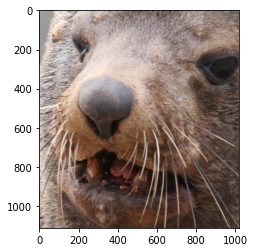

In [138]:
img = Image.open("./yolov5/runs/detect/exp2/crops/face/7T5A8450.jpg")
plt.imshow(img)

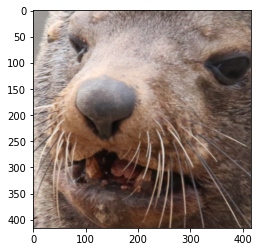

In [139]:
img_resize = img.resize((416, 416), Image.Resampling.BILINEAR) 
plt.imshow(img_resize)

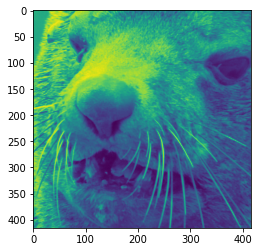

In [140]:
gray = rgb2gray(img_resize) / 255.0
plt.imshow(gray)

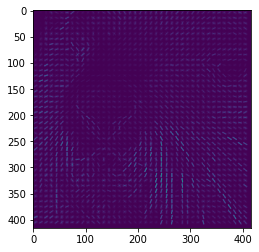

In [141]:
features, hog_image = ft.hog(gray,  # input image
                  orientations=12,  # number of bins
                  pixels_per_cell=[10, 10], # pixel per cell
                  cells_per_block=[4, 4], # cells per blcok
                  block_norm = 'L1', #  block norm : str {‘L1’, ‘L1-sqrt’, ‘L2’, ‘L2-Hys’}, optional
                  transform_sqrt = True, # power law compression (also known as gamma correction)
                  feature_vector=True, # flatten the final vectors
                  visualize=True) # return HOG map
plt.imshow(hog_image)

# Step-6-1: Evaluate the euclidean distance of two similar images HOG features

In [8]:
img_a = Image.open("./yolov5/runs/detect/exp2/crops/face/7T5A8407.jpg")
img_resize = img_a.resize((416, 416), Image.Resampling.BILINEAR) 
gray = rgb2gray(img_resize) / 255.0
features1 = ft.hog(gray,  # input image
                  orientations=12,  # number of bins
                  pixels_per_cell=[10, 10], # pixel per cell
                  cells_per_block=[4, 4], # cells per blcok
                  block_norm = 'L1', #  block norm : str {‘L1’, ‘L1-sqrt’, ‘L2’, ‘L2-Hys’}, optional
                  transform_sqrt = True, # power law compression (also known as gamma correction)
                  feature_vector=True, # flatten the final vectors
                  visualize=False) # return HOG map
img_b = Image.open("./yolov5/runs/detect/exp2/crops/face/7T5A8416.jpg")
img_resize = img_b.resize((416, 416), Image.Resampling.BILINEAR) 
gray = rgb2gray(img_resize) / 255.0
features2 = ft.hog(gray,  # input image
                  orientations=12,  # number of bins
                  pixels_per_cell=[10, 10], # pixel per cell
                  cells_per_block=[4, 4], # cells per blcok
                  block_norm = 'L1', #  block norm : str {‘L1’, ‘L1-sqrt’, ‘L2’, ‘L2-Hys’}, optional
                  transform_sqrt = True, # power law compression (also known as gamma correction)
                  feature_vector=True, # flatten the final vectors
                  visualize=False) # return HOG map

print(np.sqrt(sum(np.power((features1 - features2), 2))))

4.706107756775142


In [143]:
features1

array([0.00187736, 0.00058475, 0.00077352, ..., 0.00106448, 0.03704895, 0.02722075])

In [144]:
features2

array([0.00339004, 0.00160055, 0.0003123 , ..., 0.01357176, 0.01095407, 0.00291392])

In [129]:
a=features1 - features2
for i in a:
    if i>0:
        print(i)

In [96]:
features

array([0.00473835, 0.00192484, 0.00089569, ..., 0.00282759, 0.00159511,
       0.00640013])

# Step-6-2:Attempt to use face_recognization package to extracet features
(unfortunately this part get failed)

In [14]:
img_a = Image.open("./yolov5/runs/detect/exp2/crops/face/7T5A8407.jpg")
img_resize = img_a.resize((416, 416), Image.Resampling.BILINEAR) 
gray = rgb2gray(img_resize) / 255.0
image = face_recognition.load_image_file("./yolov5/runs/detect/exp2/crops/face/7T5A8407.jpg")
image_encoding = face_recognition.face_encodings(image)
print(image_encoding)

[]


# Step-6-3:Attempt to use Deepface package to extracet features

In [21]:
from deepface import DeepFace
embedding = DeepFace.represent(img_path = "./yolov5/runs/detect/exp2/crops/face/7T5A8407.jpg",model_name = "VGG-Face",enforce_detection=False)
print(len(embedding))

1/1 [==============================] - 0s 371ms/step
2622


In [148]:

embedding_a = np.array(DeepFace.represent(img_path = "./yolov5/runs/detect/exp2/crops/face/7T5A8416.jpg",
                               model_name = "VGG-Face",enforce_detection=False))
embedding_b = np.array(DeepFace.represent(img_path = "./yolov5/runs/detect/exp2/crops/face/7T5A8480.jpg",
                               model_name = "VGG-Face",enforce_detection=False))

print(np.power(sum(np.power((embedding_a - embedding_b), 4)),0.25))

1/1 [==============================] - 0s 391ms/step
0.05054142929944232


# Step-7: Face features clustering

### Step-7-1: Find the most suitable parameter for clustering
#### the first part is for HOG

In [5]:
files = os.listdir("./yolov5/runs/detect/exp2/crops/face/")
result = []
from deepface.commons import functions
from deepface.basemodels import VGGFace
model = VGGFace.loadModel()
for file in files:
    img = img=Image.open("./yolov5/runs/detect/exp2/crops/face/"+file)
    img_resize = img.resize((416, 416), Image.Resampling.BILINEAR)
    gray = rgb2gray(img_resize) / 255.0
    features = ft.hog(gray,  # input image
                  orientations=12,  # number of bins
                  pixels_per_cell=[10, 10], # pixel per cell
                  cells_per_block=[4, 4], # cells per blcok
                  block_norm = 'L1', #  block norm : str {‘L1’, ‘L1-sqrt’, ‘L2’, ‘L2-Hys’}, optional
                  transform_sqrt = True, # power law compression (also known as gamma correction)
                  feature_vector=True, # flatten the final vectors
                  visualize=False) # return HOG map
    result.append(features)

result=np.array(result)
k = 5 
k_dist = []
for i in range(result.shape[0]):
    dist=np.sqrt(sum(np.power((result[i] - result), 2)))
    dist.sort()
    k_dist.append(dist[k])
k_dist.sort()
k_dist=np.array(k_dist)


In [11]:
print(k_dist.shape[0])

86


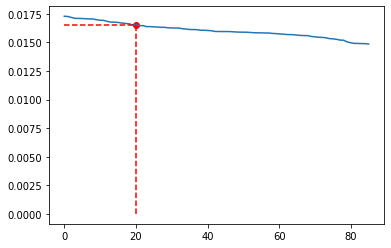

The suitable parameter eps is: 0.016530012368205615


In [22]:
plt.plot(np.arange(k_dist.shape[0]),k_dist[::-1])
eps = k_dist[::-1][20]
plt.scatter(20,eps,color="r")
plt.plot([0,20],[eps,eps],linestyle="--",color = "r")
plt.plot([20,20],[0,eps],linestyle="--",color = "r")
plt.show()
print("The suitable parameter eps is:",eps)

we can find that the result of HOG analysis is not ideal.It is hard to find a appropraite value that satisfy the need of clustering

#### the second part is for features extracted by CNN

In [219]:
files = os.listdir("./yolov5/runs/detect/exp2/crops/face/")
result = []
from deepface.commons import functions
from deepface.basemodels import VGGFace
model = VGGFace.loadModel()
for file in files:
    img = Image.open("./yolov5/runs/detect/exp2/crops/face/"+file)
    img = img.resize((416, 416), Image.Resampling.BILINEAR)
    
    img = functions.preprocess_face("./yolov5/runs/detect/exp2/crops/face/"+file, target_size=(224, 224), grayscale = False, enforce_detection = False, detector_backend = 'mtcnn', return_region = False, align = True)
    features = model.predict(img)[0,:]
#     features = DeepFace.represent(img_path = "./yolov5/runs/detect/exp2/crops/face/"+file,model_name = "VGG-Face",enforce_detection=False)
    result.append(features)

result=np.array(result)


1/1 [==============================] - 0s 100ms/step


1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 62ms/step


1/1 [==============================] - 0s 465ms/step


In [220]:
print(result[0].shape)

(2622,)


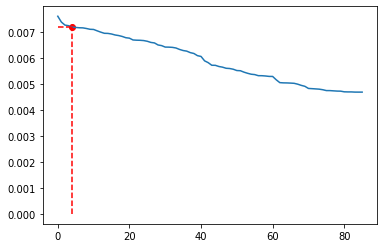

The suitable parameter eps is: 0.00717987


In [222]:
k = 2 
k_dist = []
for i in range(result.shape[0]):
    dist=np.power(sum(np.power((result[i] - result), 4)),0.25)
    # the distance we define is  Minkowski distance and the constant p is equals to 4
    dist.sort()
    k_dist.append(dist[k])
k_dist.sort()
k_dist=np.array(k_dist)
plt.plot(np.arange(k_dist.shape[0]),k_dist[::-1])
eps = k_dist[::-1][4]
plt.scatter(2,eps,color="r")
plt.plot([0,4],[eps,eps],linestyle="--",color = "r")
plt.plot([4,4],[0,eps],linestyle="--",color = "r")
plt.show()
print("The suitable parameter eps is:",eps)

### Step-7-2: Clustering the feature by using DBCAN metric

In [178]:
files = os.listdir("./yolov5/runs/detect/exp2/crops/face/")
result = []

for file in files:
#     img = img=Image.open("./yolov5/runs/detect/exp2/crops/face/"+file)
#     img_resize = img.resize((416, 416), Image.Resampling.BILINEAR)
#     gray = rgb2gray(img_resize) / 255.0
#     features = ft.hog(gray,  # input image
#                   orientations=12,  # number of bins
#                   pixels_per_cell=[10, 10], # pixel per cell
#                   cells_per_block=[4, 4], # cells per blcok
#                   block_norm = 'L1', #  block norm : str {‘L1’, ‘L1-sqrt’, ‘L2’, ‘L2-Hys’}, optional
#                   transform_sqrt = True, # power law compression (also known as gamma correction)
#                   feature_vector=True, # flatten the final vectors
#                   visualize=False) # return HOG map
    features = DeepFace.represent(img_path = "./yolov5/runs/detect/exp2/crops/face/"+file,model_name = "VGG-Face",enforce_detection=False)
    result.append(features)
clf = DBSCAN(eps=0.022, min_samples=2, metric="minkowski",p=4, n_jobs=-1)
clf.fit(result)

1/1 [==============================] - 0s 382ms/step


DBSCAN(eps=0.022, metric='minkowski', min_samples=2, n_jobs=-1, p=4)

In [179]:
np.unique(clf.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8])

In [180]:
seal_number=len(np.unique(clf.labels_))
print("We have recognized ",seal_number," furseals")

We have recognized  10  furseals


In [181]:
labels = list(clf.labels_)

In [200]:
[i for i, x in enumerate(labels) if x==0]

[0, 5, 6, 11, 18, 26, 31, 35, 45, 55, 61, 69, 72, 75, 82]

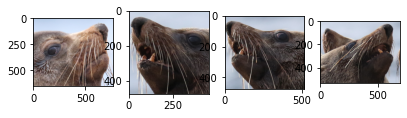

In [197]:
plt.figure(figsize=(10, 10))
for m in range(len([i for i, x in enumerate(labels) if x==3])): 
    plt.subplot(len([i for i, x in enumerate(labels) if x==3])//6+1, 6 , m + 1)
    img = Image.open("./yolov5/runs/detect/exp2/crops/face/"+files[[i for i, x in enumerate(labels) if x==3][m]])
#     img_resize = img.resize((416, 416), Image.Resampling.BILINEAR)
#     img = rgb2gray(img_resize) / 255.0
    plt.imshow(img)
plt.show()

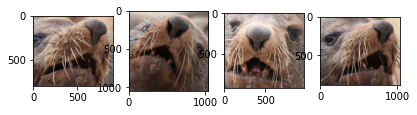

In [198]:
plt.figure(figsize=(10, 10))
for m in range(len([i for i, x in enumerate(labels) if x==8])): 
    plt.subplot(len([i for i, x in enumerate(labels) if x==8])//6+1, 6 , m + 1)
    img = Image.open("./yolov5/runs/detect/exp2/crops/face/"+files[[i for i, x in enumerate(labels) if x==8][m]])
#     img_resize = img.resize((416, 416), Image.Resampling.BILINEAR)
#     img = rgb2gray(img_resize) / 255.0
    plt.imshow(img)
plt.show()

# Step-8: Construct a image base for saving the furseal images

In [207]:
record_list=[[] for i in range(seal_number)]
for n in range(seal_number):
    num='%s' %n
    print("make file for ./data/furseal_"+num)
    save_path="./data/furseal_"+num
    os.makedirs(save_path,exist_ok=True)
    for m in range(len([i for i, x in enumerate(labels) if x==n-1])): 
#         print("./yolov5/runs/detect/exp2/crops/face/"+files[[i for i, x in enumerate(labels) if x==n-1][m]])
        img = Image.open("./yolov5/runs/detect/exp2/crops/face/"+files[[i for i, x in enumerate(labels) if x==n-1][m]])
        img.save(save_path+"/"+files[[i for i, x in enumerate(labels) if x==n-1][m]])
        record_list[n].append(files[[i for i, x in enumerate(labels) if x==n-1][m]])

make file for ./data/furseal_0
make file for ./data/furseal_1
make file for ./data/furseal_2
make file for ./data/furseal_3
make file for ./data/furseal_4
make file for ./data/furseal_5
make file for ./data/furseal_6
make file for ./data/furseal_7
make file for ./data/furseal_8
make file for ./data/furseal_9


In [208]:
print(record_list)

[['IMG_67212.jpg', 'IMG_6752.jpg', '7T5A84805.jpg', '7T5A84552.jpg', '7T5A9446.jpg', '7T5A9474.jpg', '7T5A94962.jpg', '7T5A8921.jpg', '7T5A94923.jpg', '7T5A94462.jpg', '7T5A9500.jpg', '7T5A8457.jpg', 'IMG_6753.jpg', '7T5A9496.jpg', '7T5A96852.jpg', '7T5A9466.jpg', '7T5A8450.jpg', '7T5A84804.jpg', '7T5A9437.jpg', '7T5A8477.jpg', '7T5A9442.jpg', '7T5A8485.jpg', '7T5A9493.jpg', '7T5A9679.jpg', '7T5A8407.jpg', '7T5A8508.jpg', '7T5A8442.jpg', '7T5A8449.jpg', '7T5A8408.jpg', '7T5A9583.jpg', '7T5A96862.jpg', '7T5A8441.jpg', '7T5A8445.jpg', '7T5A8753.jpg', '7T5A9492.jpg', '7T5A96863.jpg', '7T5A9686.jpg'], ['7T5A8935.jpg', '7T5A9635.jpg', 'IMG_67252.jpg', '7T5A9452.jpg', '7T5A9451.jpg', '7T5A9454.jpg', '7T5A9564.jpg', 'IMG_6725.jpg', 'IMG_6721.jpg', '7T5A89212.jpg', '7T5A8455.jpg', '7T5A9654.jpg', 'IMG_6716.jpg', 'IMG_67172.jpg', 'IMG_6717.jpg'], ['IMG_67532.jpg', '7T5A96853.jpg', 'IMG_67522.jpg', '7T5A84854.jpg', '7T5A84855.jpg', '7T5A84806.jpg', 'IMG_67534.jpg', 'IMG_67533.jpg'], ['7T5A84802.

# Step-9 Find out the potential relationships between furseals by using records
Here we make an assumption that if two furseals occur in same image for at least three times, we think they are  from same family

In [211]:
print(record_list[0][0].split('.')[0][:-1])

IMG_6721


In [212]:
count_list=[[] for i in range(seal_number)]
for i in range(seal_number):
    for j in range(seal_number):
        count_list[i].append(0)
for i in range(seal_number):
    for j in range(i+1,seal_number):
        for p in range(len(record_list[i])):
            for q in range(len(record_list[j])):
                a= record_list[i][p].split('.')[0]
                b= record_list[j][q].split('.')[0]
                if a==b or a[:-1]==b or a==b[:-1] or a[:-1]==b[:-1]:
                    count_list[i][j]=count_list[i][j]+1

In [213]:
print(count_list)

[[0, 5, 9, 9, 5, 4, 2, 3, 3, 6], [0, 0, 0, 0, 0, 0, 3, 0, 0, 3], [0, 0, 0, 5, 0, 1, 0, 1, 2, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


In [214]:
for i in range(seal_number):
    for j in range(seal_number):
        if count_list[i][j]>=3:
            print("furseal ",i," and furseal ",j," are family")

furseal  0  and furseal  1  are family
furseal  0  and furseal  2  are family
furseal  0  and furseal  3  are family
furseal  0  and furseal  4  are family
furseal  0  and furseal  5  are family
furseal  0  and furseal  7  are family
furseal  0  and furseal  8  are family
furseal  0  and furseal  9  are family
furseal  1  and furseal  6  are family
furseal  1  and furseal  9  are family
furseal  2  and furseal  3  are family
